In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
cd=pd.read_csv("C:\\Users\\rabhi\\OneDrive\\Documents\\Country-data.csv")
cd1=pd.read_csv("C:\\Users\\rabhi\\OneDrive\\Documents\\Country-data.csv")

In [181]:
cd.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [182]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [183]:
cd.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<Figure size 720x720 with 0 Axes>

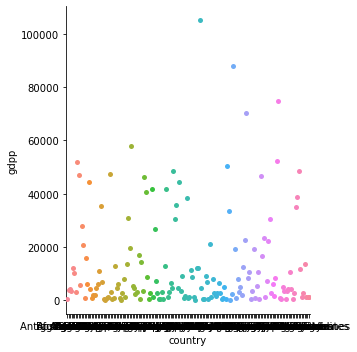

<Figure size 720x720 with 0 Axes>

In [184]:
sns.catplot(x='country',y='gdpp',data=cd)
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

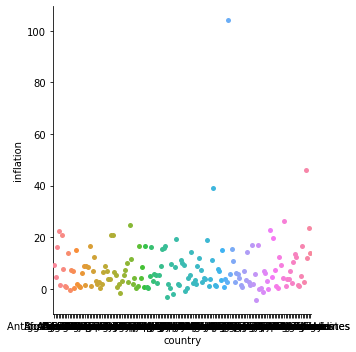

<Figure size 720x720 with 0 Axes>

In [185]:
sns.catplot(x='country',y='inflation',data=cd)
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

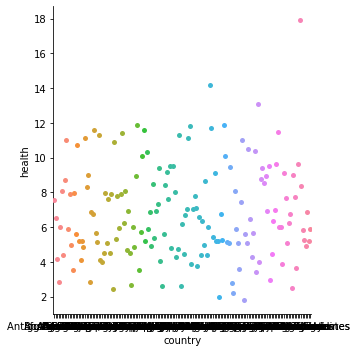

<Figure size 720x720 with 0 Axes>

In [186]:
sns.catplot(x='country',y='health',data=cd)
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

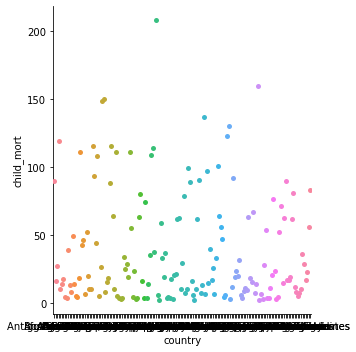

<Figure size 720x720 with 0 Axes>

In [187]:
sns.catplot(x='country',y='child_mort',data=cd)
plt.figure(figsize=(10,10))

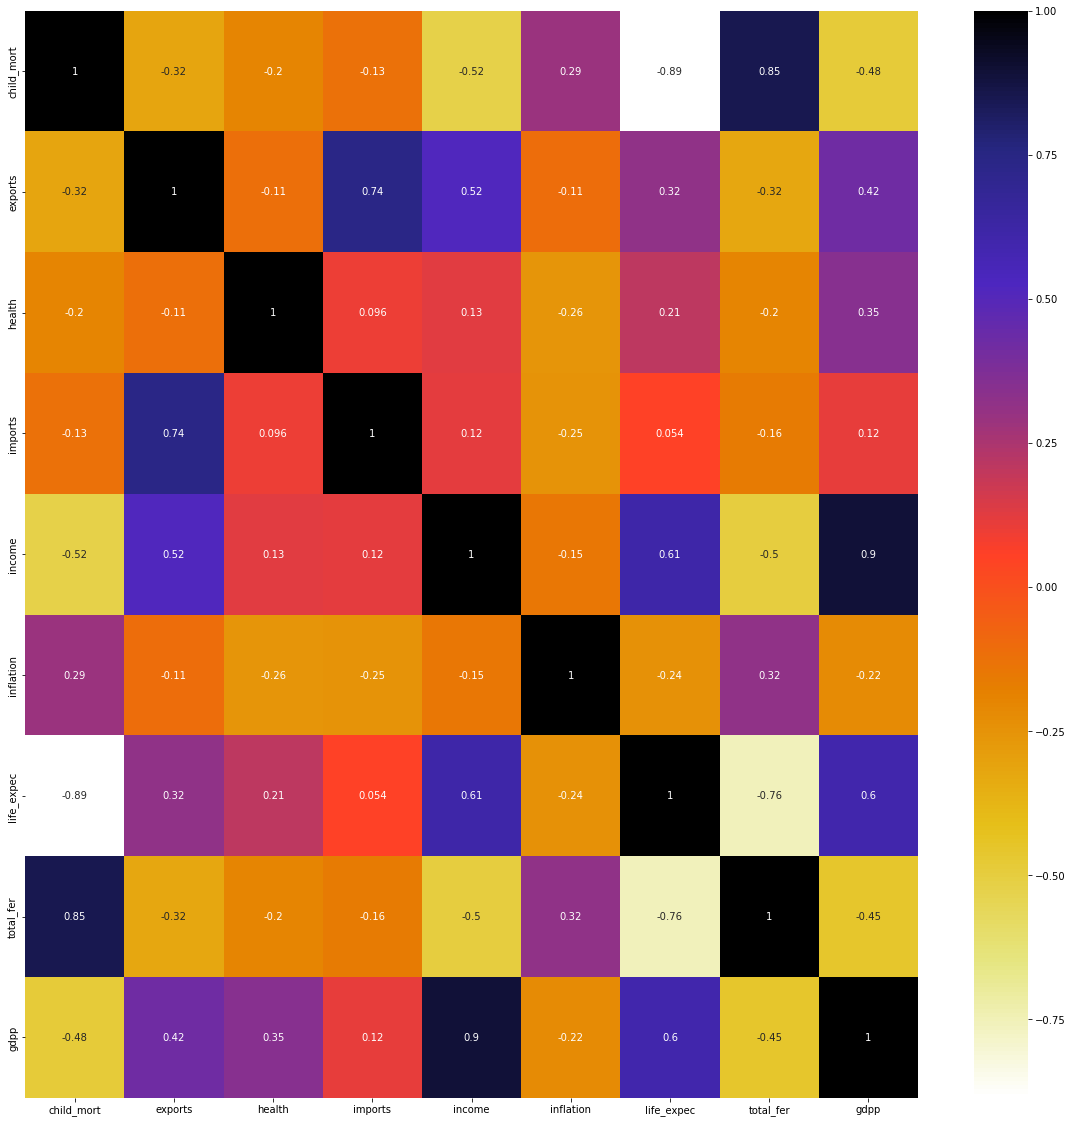

In [188]:
plt.figure(figsize=(20,20))
cor=cd.drop(['country'],axis=1).corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [189]:
cd=cd.drop(['country'],axis=1)

In [190]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()

In [191]:
objLis = cd.select_dtypes(exclude = "object").columns

In [192]:
for feat in objLis:
    cd[feat] = m.fit_transform(cd[feat].to_numpy().reshape(-1,1))

In [193]:
cd

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


In [194]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [195]:
corr_features = correlation(cd, 0.70)
len(set(corr_features))

4

In [196]:
cd=cd.drop(corr_features,axis=1)

In [197]:
cd

,child_mort,exports,health,income,inflation
0,0.426485,0.049482,0.358608,0.008047,0.126144
1,0.068160,0.139531,0.294593,0.074933,0.080399
2,0.120253,0.191559,0.146675,0.098809,0.187691
3,0.566699,0.311125,0.064636,0.042535,0.245911
4,0.037488,0.227079,0.262275,0.148652,0.052213
...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.018820,0.063118
163,0.070594,0.142032,0.192666,0.127750,0.463081
164,0.100779,0.359651,0.312617,0.031200,0.150725
165,0.261441,0.149536,0.209447,0.031120,0.257000


In [198]:
from sklearn.cluster import KMeans
l=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(cd)
    l.append(kmeans.inertia_)

C:\Users\rabhi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


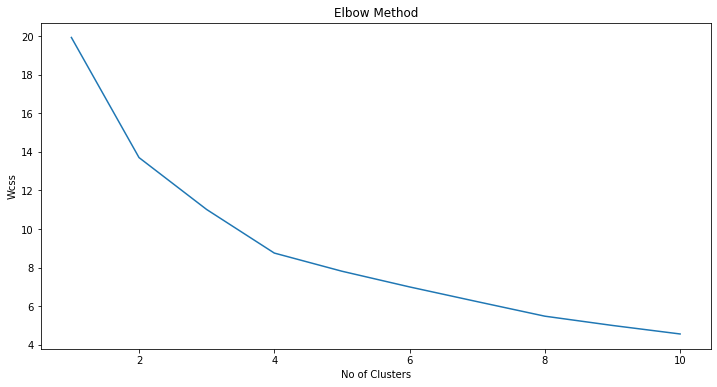

In [199]:
plt.plot(range(1,11),l)
plt.xlabel('No of Clusters')
plt.ylabel('Wcss')
plt.title('Elbow Method')
plt.show()

In [200]:
kmeansmodel=KMeans(n_clusters=5, init="k-means++", random_state=0)
y_kmeans=kmeansmodel.fit_predict(cd)

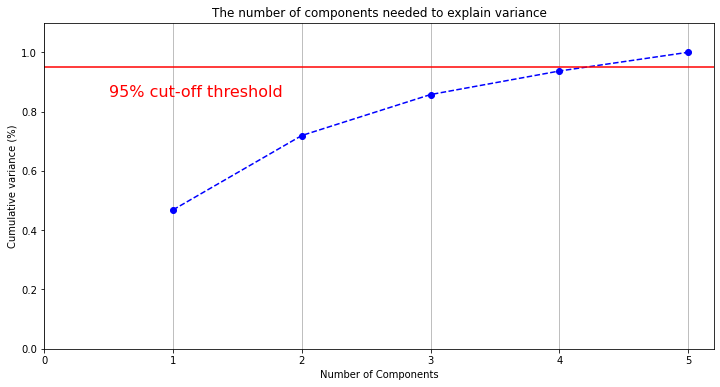

In [201]:
from sklearn.decomposition import PCA
#pca=PCA(2)
#X=pca.fit_transform(cd)
pca = PCA().fit(cd)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 6, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 6, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [202]:
pca1=PCA(4)
X=pca1.fit_transform(cd)

In [203]:
pd.DataFrame(pca1.components_.T, index=['child_mort','exports','health','income','inflation'], columns =['PC-1', 'PC-2','PC-3','PC-4'])

,PC-1,PC-2,PC-3,PC-4
child_mort,0.749323,0.012087,0.635622,0.032102
exports,-0.309922,-0.396380,0.503825,-0.609418
health,-0.242668,0.886468,0.331073,-0.062515
income,-0.512421,-0.199421,0.480258,0.592723
inflation,0.144916,-0.130932,0.043444,0.521872


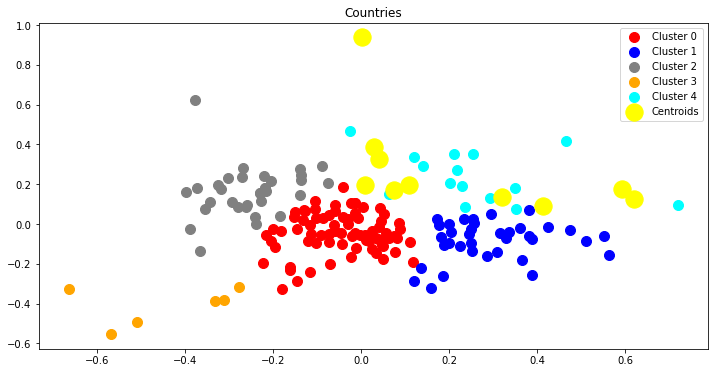

In [204]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'grey', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Countries')
plt.legend()
plt.show()

In [210]:
kms = KMeans(n_clusters=5, random_state=1).fit(cd[['health', 'inflation','income','child_mort','exports']])
cd['Cluster'] = kms.labels_
cd['Cluster Centroid D1'] = cd['Cluster'].apply(lambda label: kms.cluster_centers_[label][0])
cd['Cluster Centroid D2'] = cd['Cluster'].apply(lambda label: kms.cluster_centers_[label][1])
cd['country']=cd1['country']
cd

,child_mort,exports,health,income,inflation,Cluster,Cluster Centroid D1,Cluster Centroid D2,country
0,0.426485,0.049482,0.358608,0.008047,0.126144,4,0.474871,0.121061,Afghanistan
1,0.068160,0.139531,0.294593,0.074933,0.080399,0,0.260145,0.108423,Albania
2,0.120253,0.191559,0.146675,0.098809,0.187691,0,0.260145,0.108423,Algeria
3,0.566699,0.311125,0.064636,0.042535,0.245911,1,0.168570,0.159192,Angola
4,0.037488,0.227079,0.262275,0.148652,0.052213,0,0.260145,0.108423,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.018820,0.063118,0,0.260145,0.108423,Vanuatu
163,0.070594,0.142032,0.192666,0.127750,0.463081,0,0.260145,0.108423,Venezuela
164,0.100779,0.359651,0.312617,0.031200,0.150725,0,0.260145,0.108423,Vietnam
165,0.261441,0.149536,0.209447,0.031120,0.257000,1,0.168570,0.159192,Yemen


In [211]:
cd.to_csv(r'C:/Users/rabhi/OneDrive/Documents/NGO_data1.csv',index=False,header=True)

In [213]:
#Cluster 4 countries are in dire need of aid
#Cluster 1 and Cluster 0 are next in line for aid
#Cluster 2 and 3 countries are comparitively in less need of aid